Image Cartoonifying

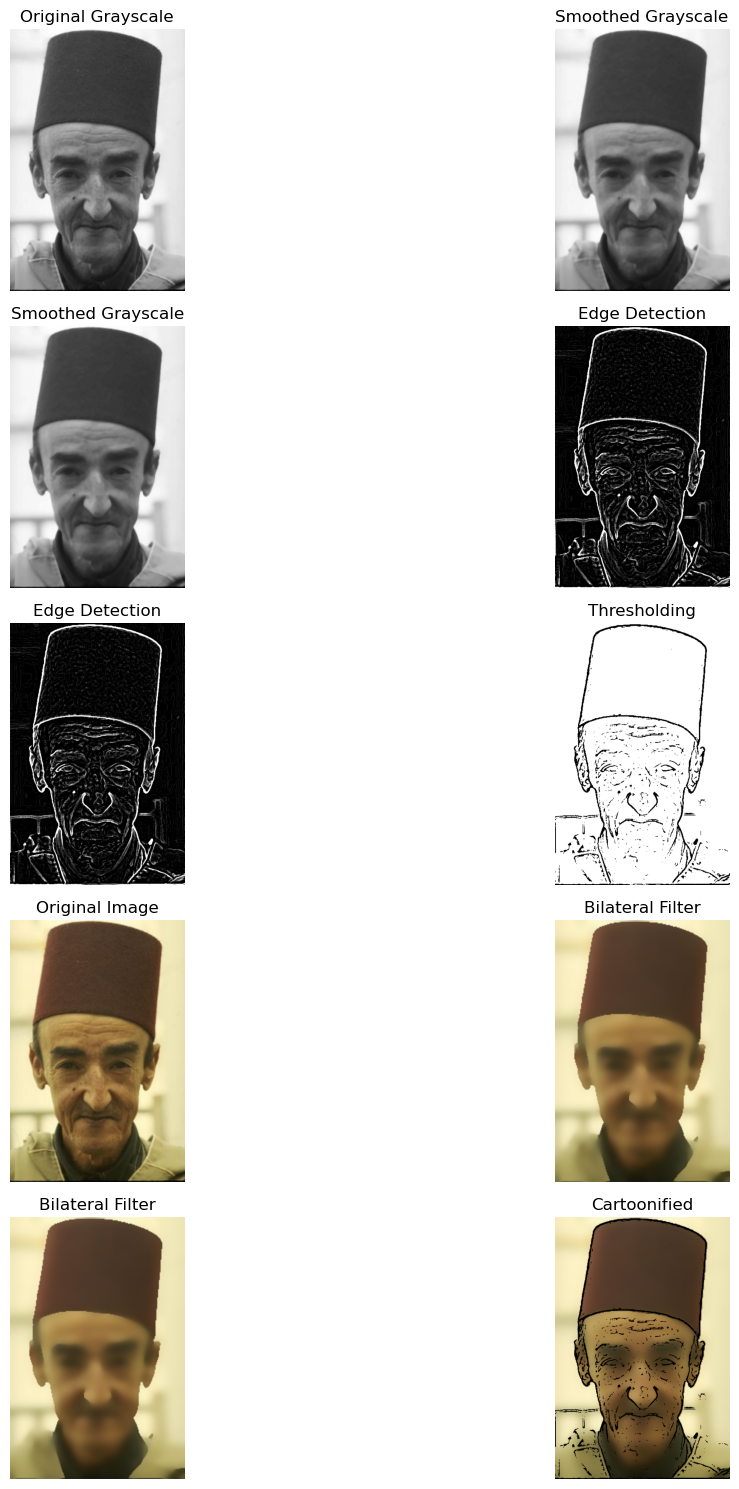

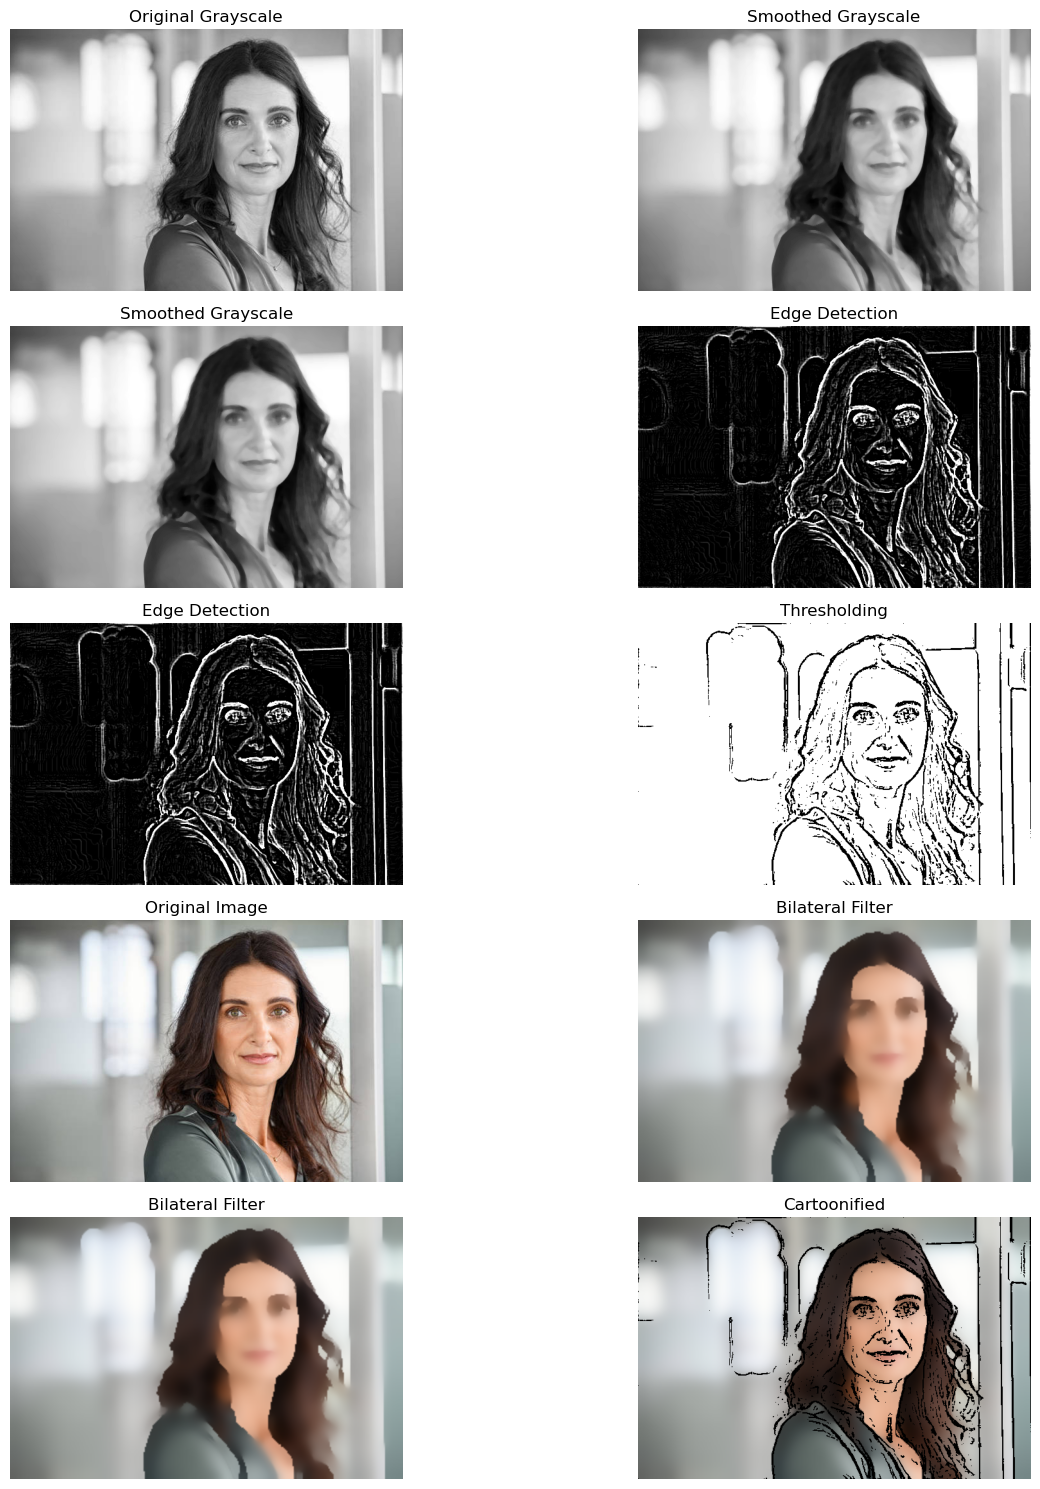

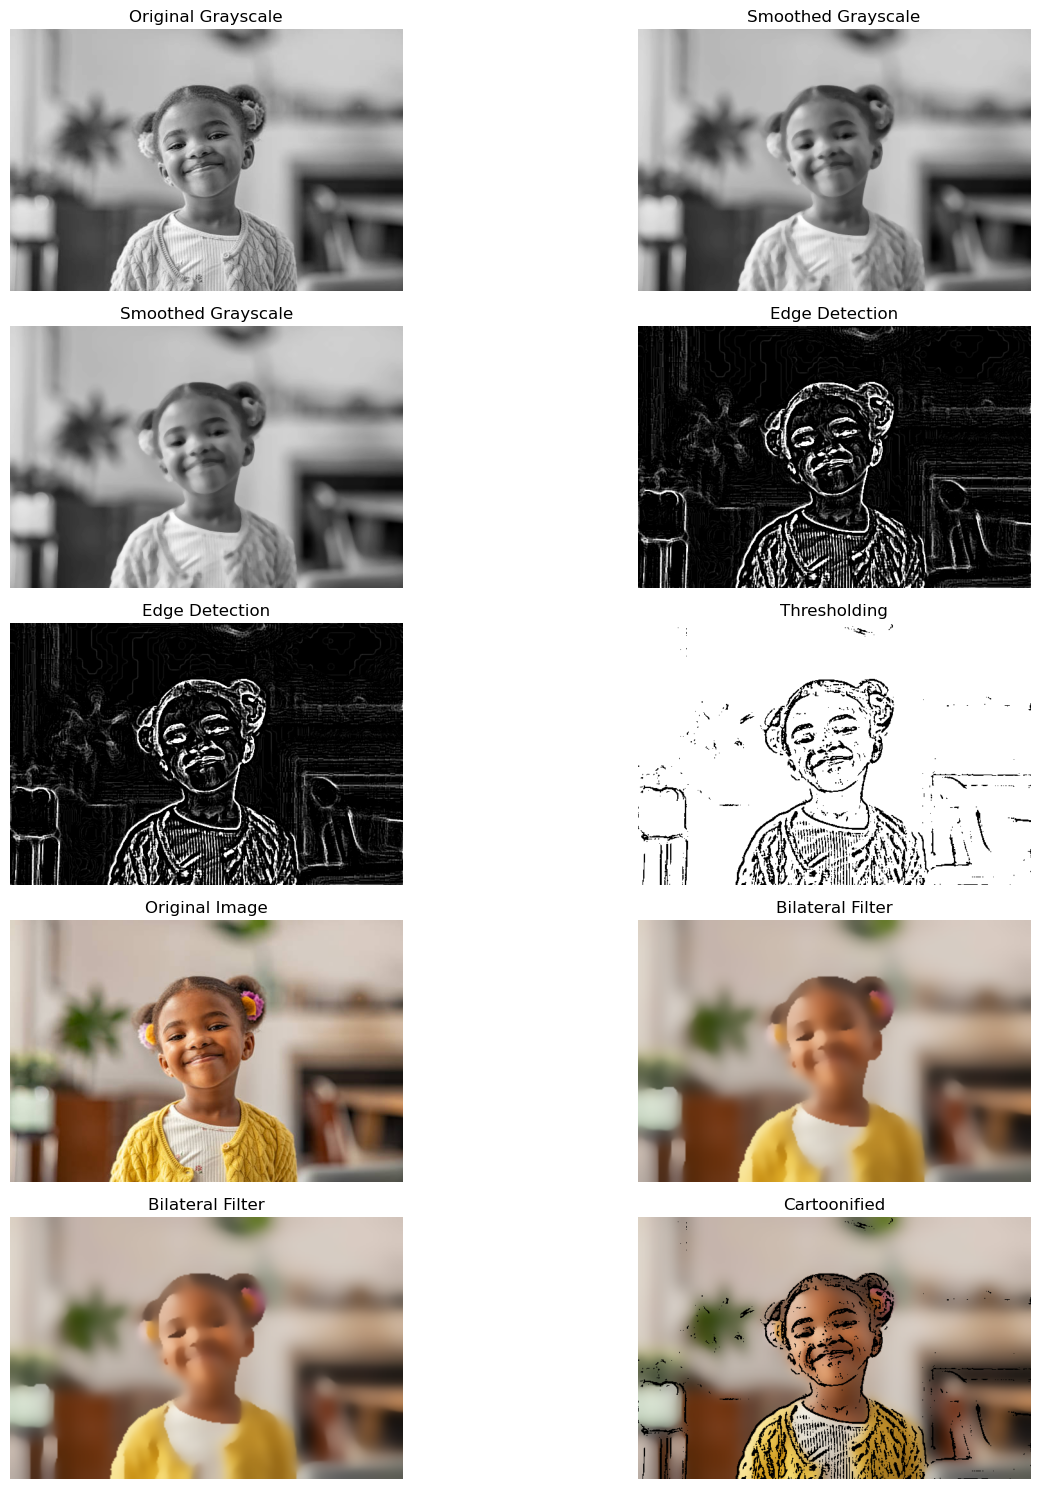

In [ ]:
import cv2
import matplotlib.pyplot as plt

def cartoonify(images):
    for image_path in images:

        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        small_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

        for _ in range(5):  
            small_image = cv2.bilateralFilter(small_image, d=9, sigmaColor=75, sigmaSpace=75)

        bilateral_filtered_image = cv2.resize(small_image, (image.shape[1], image.shape[0]))
        bilateral_filtered_image_rgb = cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2RGB)

        smoothed_image = cv2.medianBlur(gray_image, 7)   # Kernel Size 7
        laplacian_edges = cv2.Laplacian(smoothed_image, cv2.CV_8U, ksize=5) # if ksize is large, edges will be thicker but less sensitive  
        _, edge_mask = cv2.threshold(laplacian_edges, 100, 255, cv2.THRESH_BINARY_INV) # binary image, value > threshold map to 0, otherwise 255

        edge_mask_colored = cv2.cvtColor(edge_mask, cv2.COLOR_GRAY2BGR)

        cartoon_image = cv2.bitwise_and(bilateral_filtered_image, edge_mask_colored)
        cartoon_image_rgb = cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(15, 15))

    # ---------------------------- Plotting ------------------------------------
        plt.subplot(5, 2, 1)
        plt.imshow(gray_image, cmap='gray')
        plt.title("Original Grayscale")
        plt.axis("off")
        plt.subplot(5, 2, 2)
        plt.imshow(smoothed_image, cmap='gray')
        plt.title("Smoothed Grayscale")
        plt.axis("off")

        plt.subplot(5, 2, 3)
        plt.imshow(smoothed_image, cmap='gray')
        plt.title("Smoothed Grayscale")
        plt.axis("off")
        plt.subplot(5, 2, 4)
        plt.imshow(laplacian_edges, cmap='gray')
        plt.title("Edge Detection")
        plt.axis("off")

        plt.subplot(5, 2, 5)
        plt.imshow(laplacian_edges, cmap='gray')
        plt.title("Edge Detection")
        plt.axis("off")
        plt.subplot(5, 2, 6)
        plt.imshow(edge_mask, cmap='gray')
        plt.title("Thresholding")
        plt.axis("off")

        plt.subplot(5, 2, 7)
        plt.imshow(image_rgb)
        plt.title("Original Image")
        plt.axis("off")
        plt.subplot(5, 2, 8)
        plt.imshow(bilateral_filtered_image_rgb)
        plt.title("Bilateral Filter")
        plt.axis("off")

        plt.subplot(5, 2, 9)
        plt.imshow(bilateral_filtered_image_rgb)
        plt.title("Bilateral Filter")
        plt.axis("off")
        plt.subplot(5, 2, 10)
        plt.imshow(cartoon_image_rgb)
        plt.title("Cartoonified")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

images = [
    r"C:\Users\ADMIN\OneDrive\Desktop\Images\man.jpg",
    r"C:\Users\ADMIN\OneDrive\Desktop\Images\woman.jpg",
    r"C:\Users\ADMIN\OneDrive\Desktop\Images\child.jpg"
]
cartoonify(images)